# Supervised Learning Project (Tree Methods Focus)

### GOAL: Given the customer information, create a model to predict whether or not a customer will Churn .

## Imports and Read in the Data



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [83]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

**Check if there is NaN cells by displaying NaN values per column.**

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Display the balance of the class labels (Churn) with a Count Plot.**

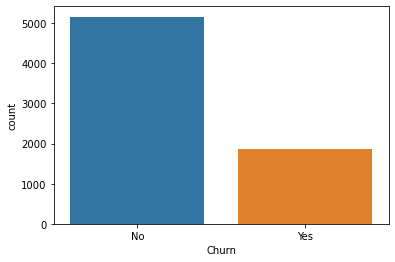

In [9]:
sns.countplot(data = df, x = 'Churn');

**Explore the distrbution of TotalCharges between Churn categories with a Violin Plot.**

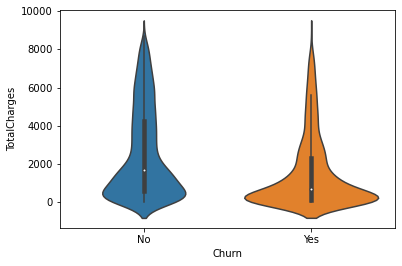

In [11]:
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges');

**Create a boxplot showing the distribution of TotalCharges per Contract type.**

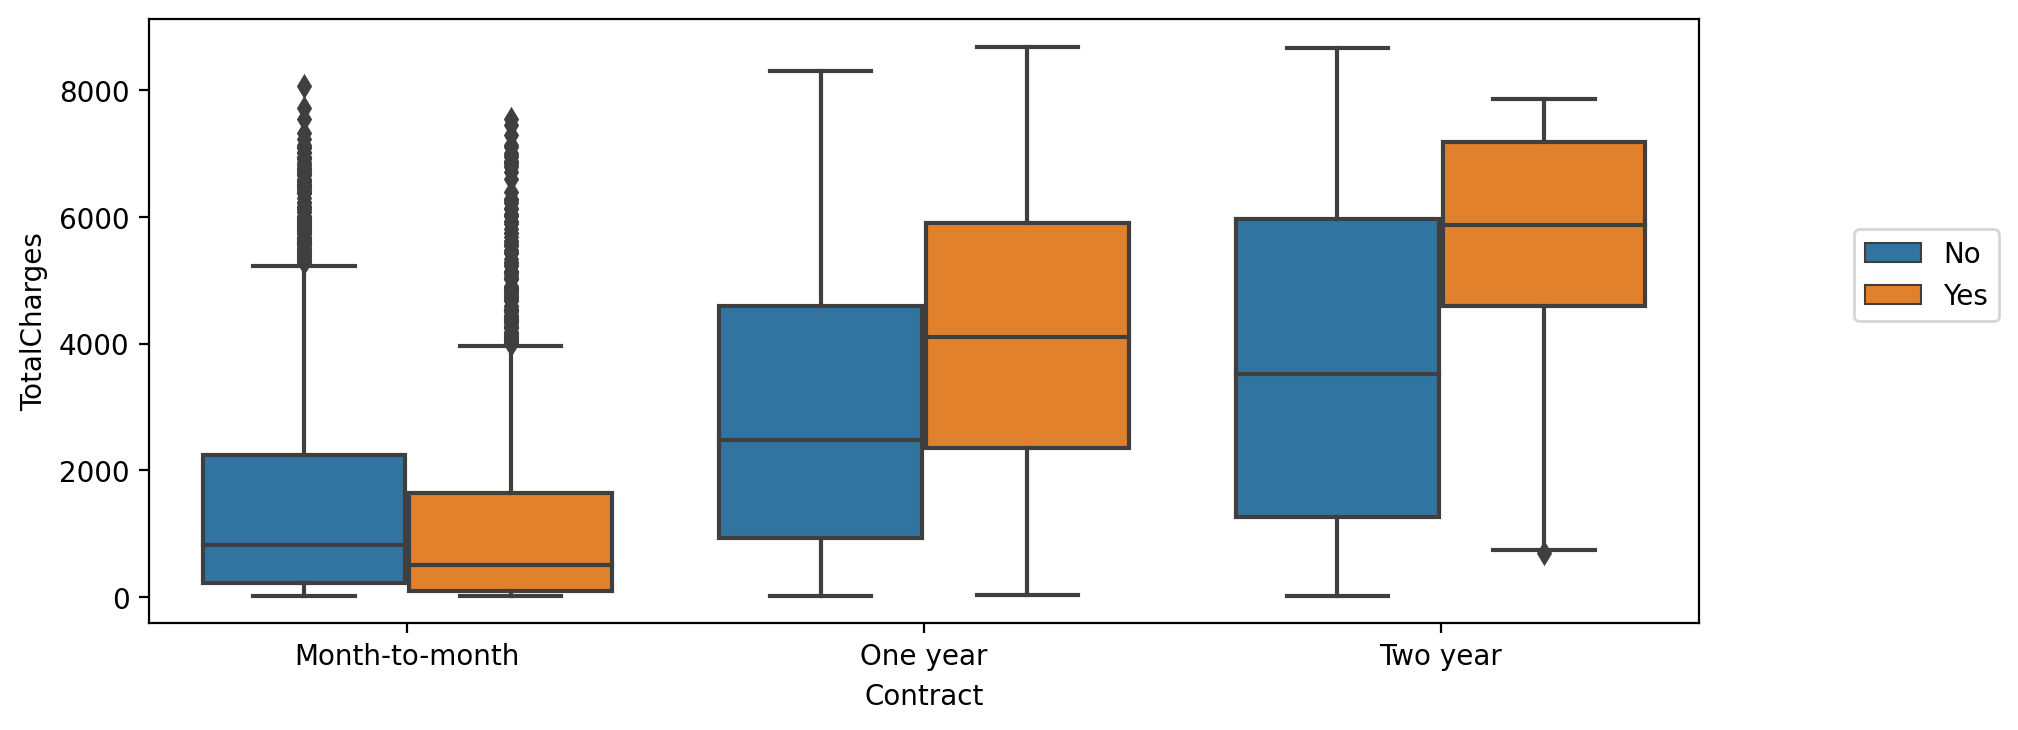

In [13]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot(data = df, y = 'TotalCharges', x = 'Contract', hue = 'Churn')
plt.legend(loc = (1.1, 0.5));

**Create a bar plot showing the correlation of the following features to the class label.** 

For the categorical features, I will first need to convert them into dummy variables.

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [14]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [16]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

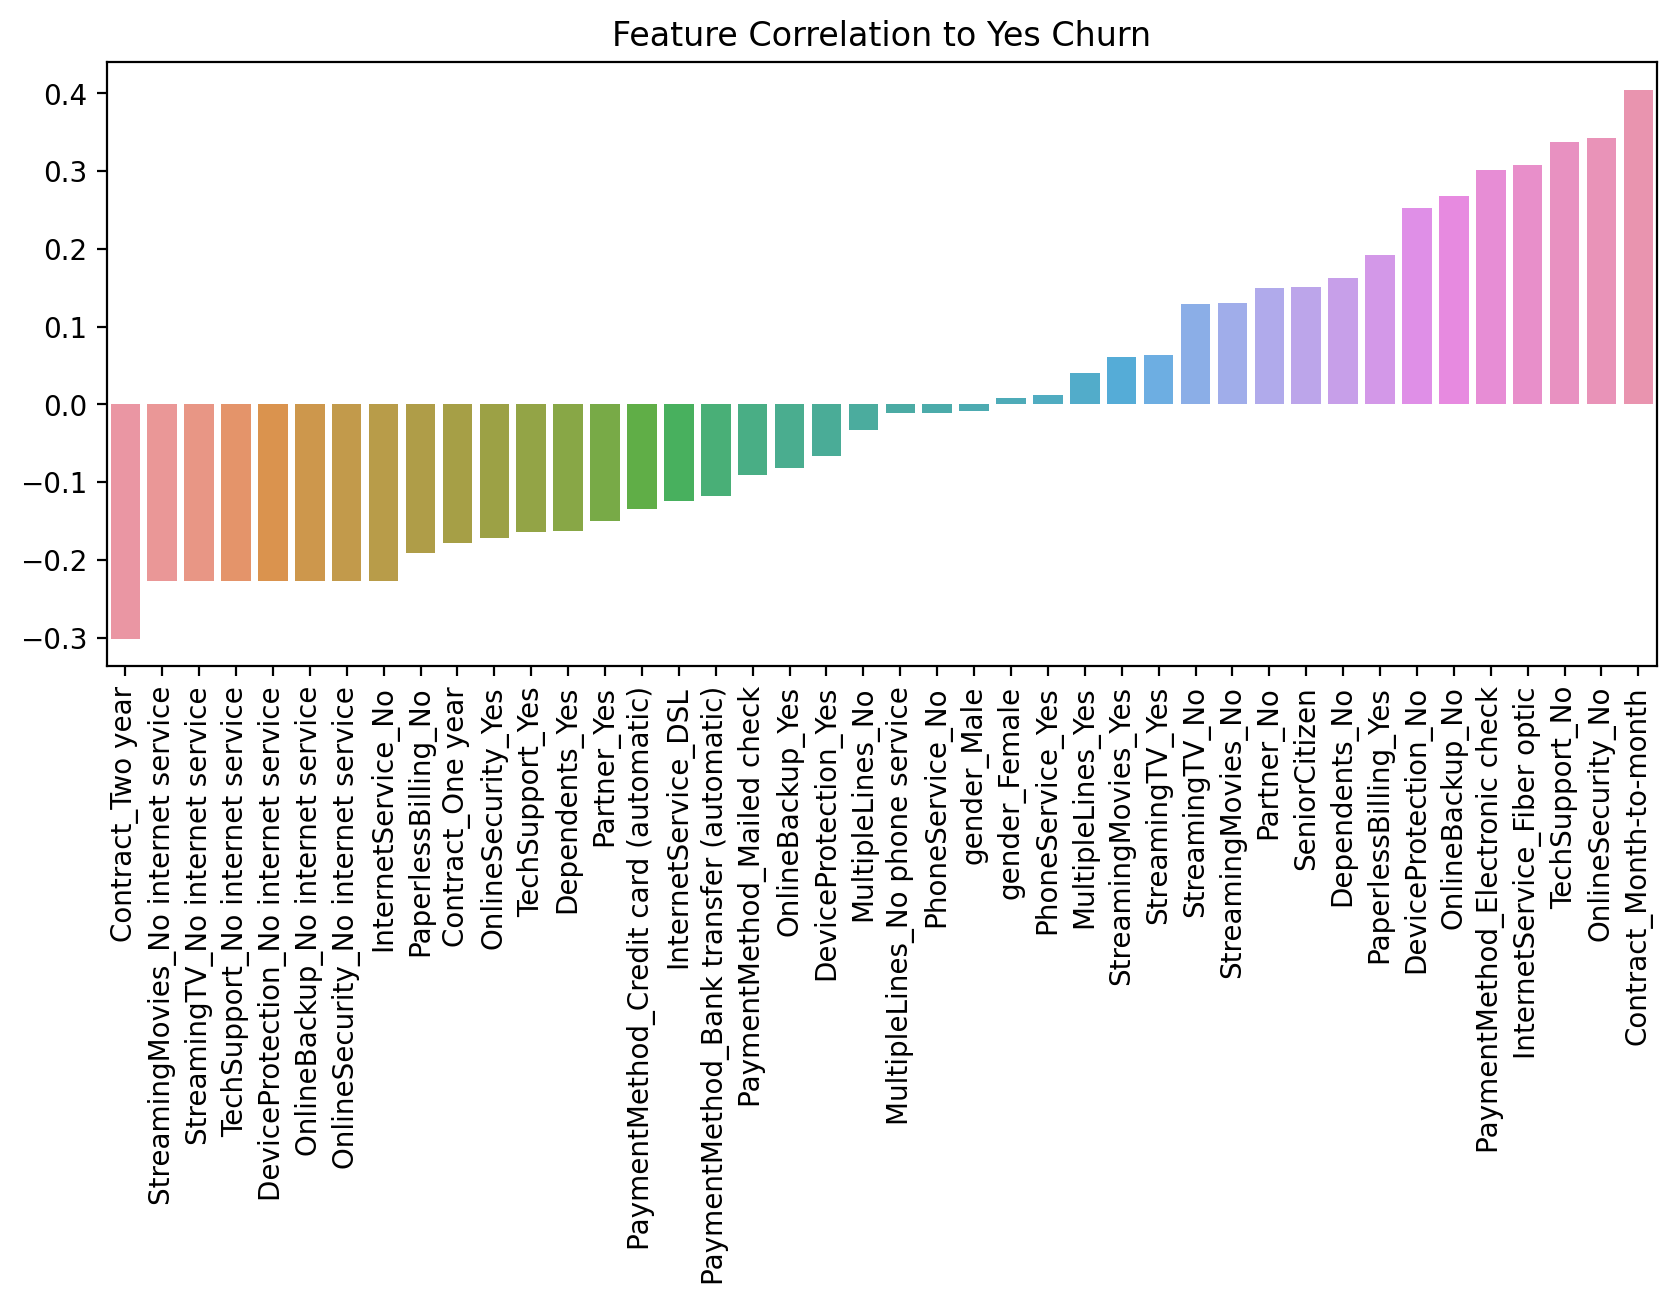

In [17]:
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(x = corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y = corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);


## Churn Analysis

**Focus on segementing customers based on their tenure, creating "cohorts", which allows to examine differences between customer cohort segments.**

**List 3 types of contract available.**

In [18]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

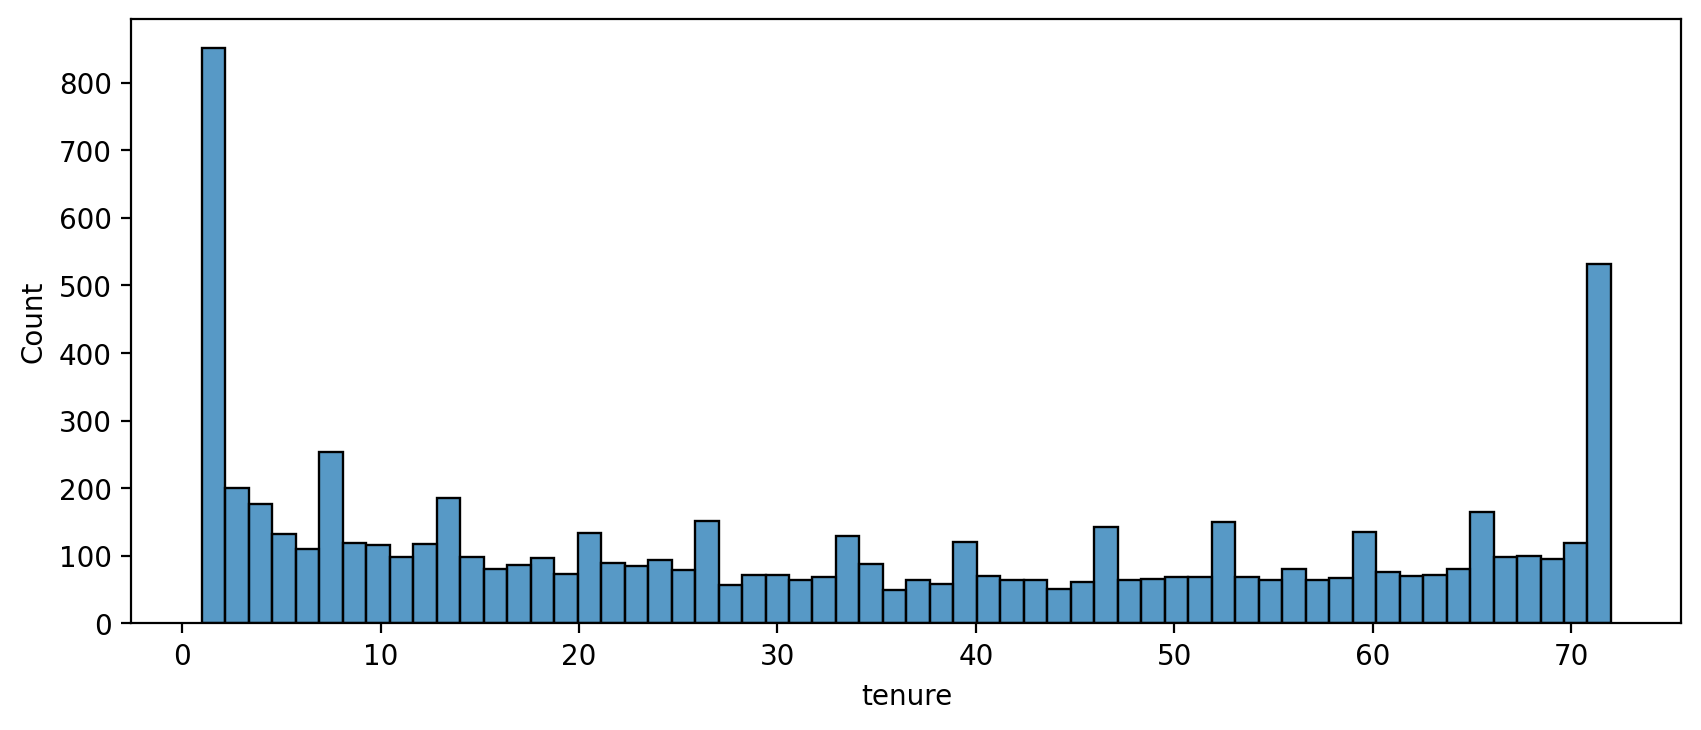

In [19]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = df, x = 'tenure', bins = 60);

**Create histograms separated by two additional features, Churn and Contract.**

<Figure size 2000x800 with 0 Axes>

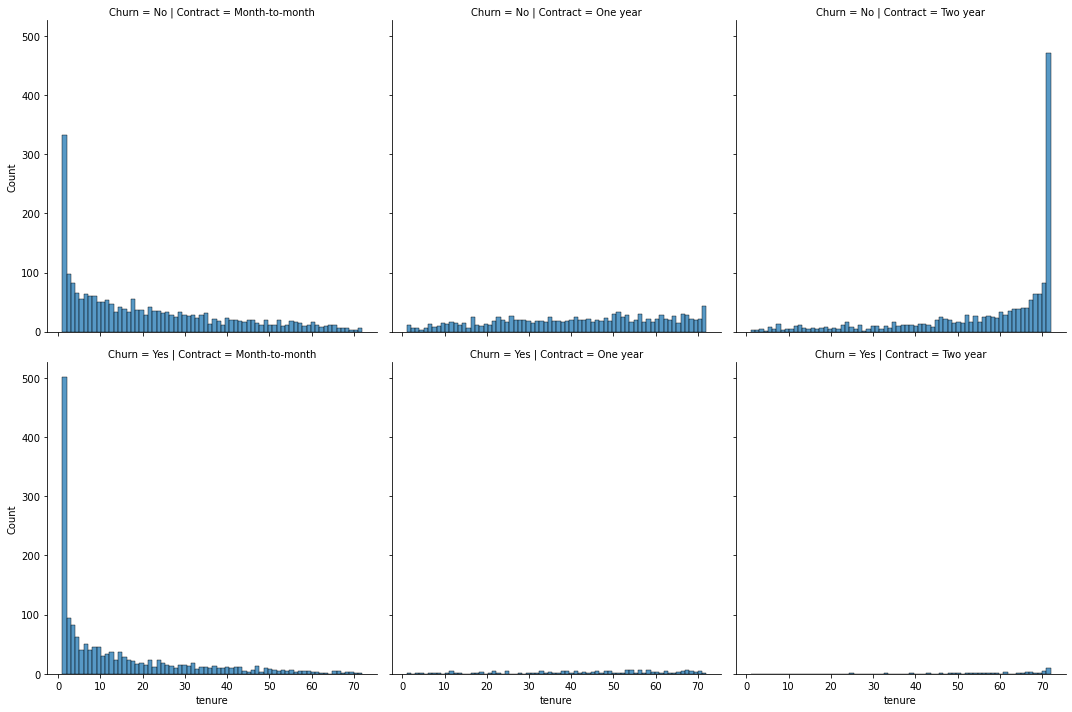

In [20]:
plt.figure(figsize = (10,4), dpi = 200)
sns.displot(data = df, x = 'tenure', bins = 70, col = 'Contract', row = 'Churn');

**Display a scatter plot of Total Charges versus Monthly Charges.**

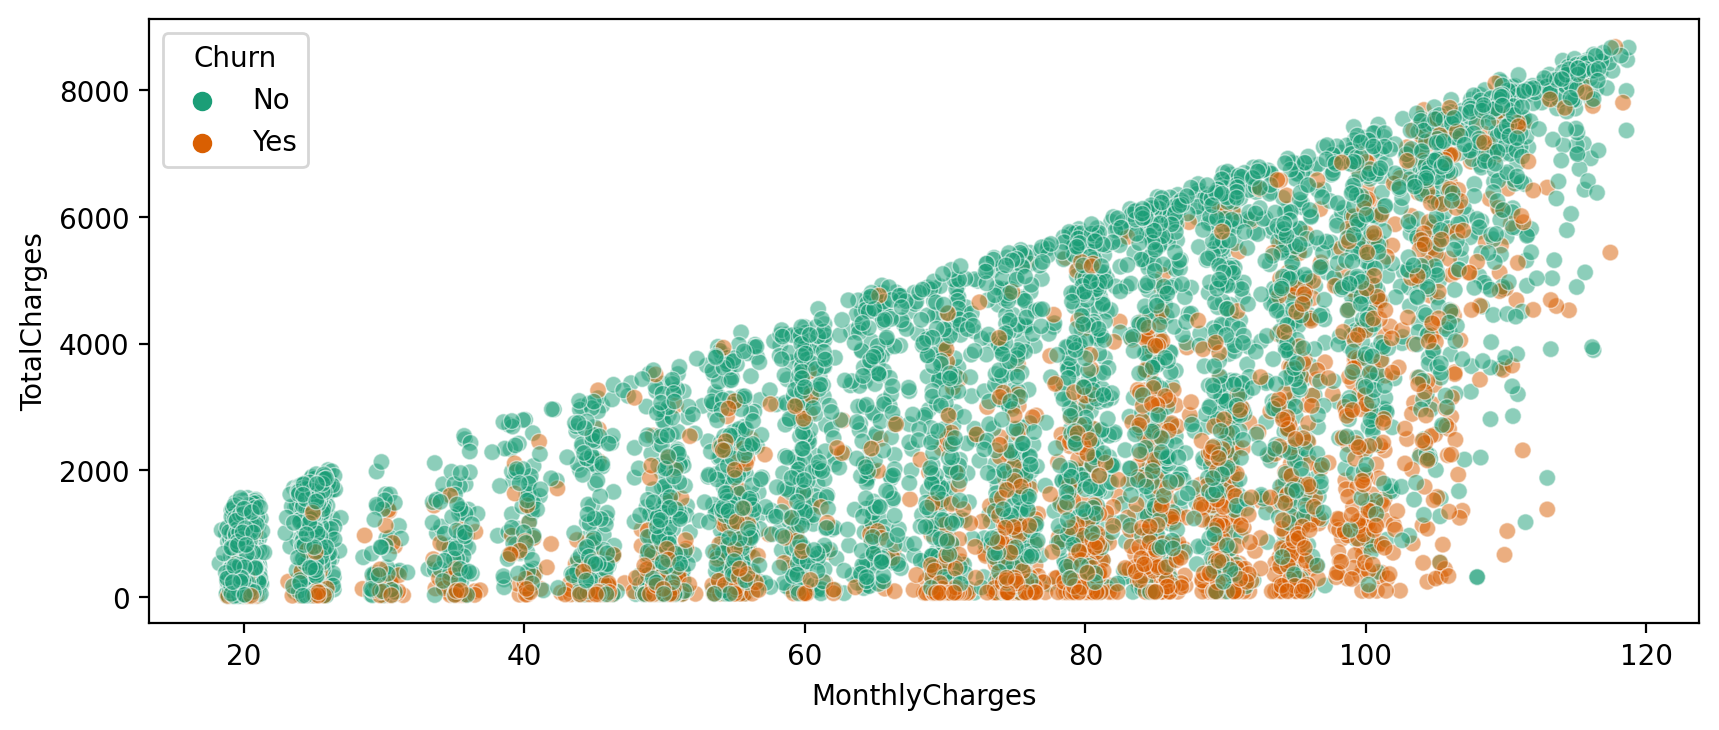

In [22]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', linewidth = 0.5, alpha = 0.5, palette = 'Dark2');

## Create Cohorts based on Tenure

**Treat each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort and calculate the Churn rate (percentage that had Yes Churn) per cohort.**

* The result is that there is a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.

In [85]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [86]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Create a plot showing churn rate per months of tenure.**

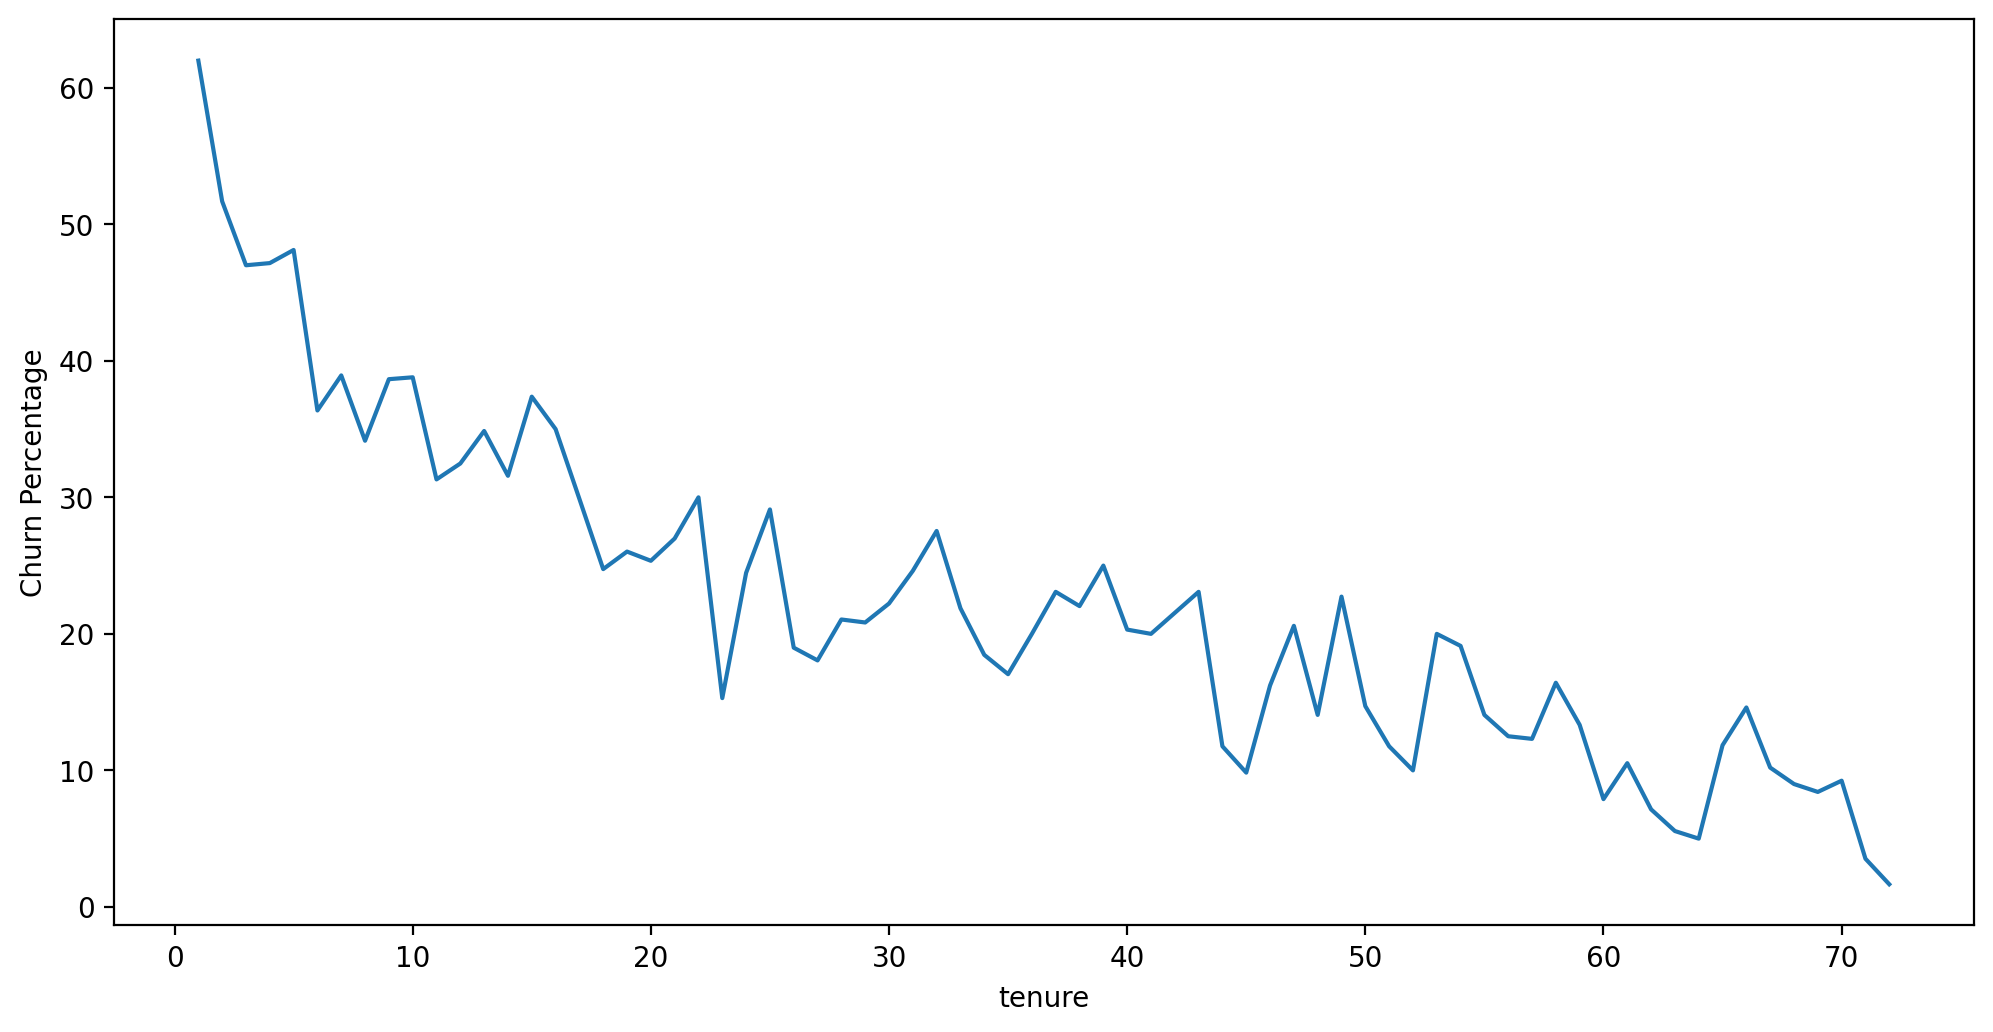

In [87]:
plt.figure(figsize = (12,6), dpi = 200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

## Broader Cohort Groups
**Create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [88]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [89]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [90]:
df.head()[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


**Create a scatterplot of Total Charges versus Monthly Charts, colored by Tenure Cohort.**

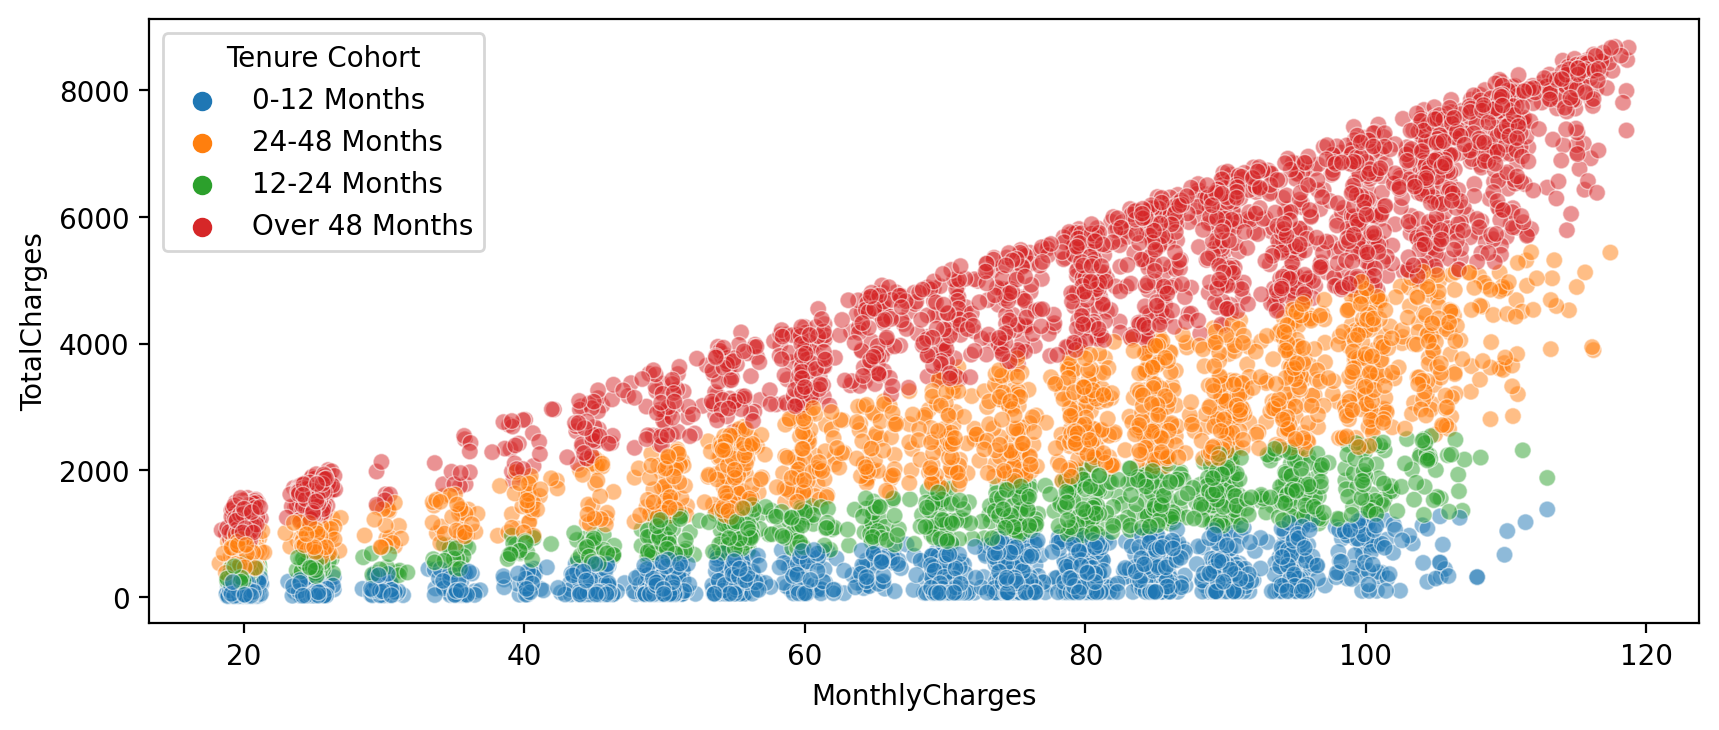

In [91]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure Cohort', linewidth = 0.5, alpha = 0.5);

**Create a count plot showing the churn count per cohort.**

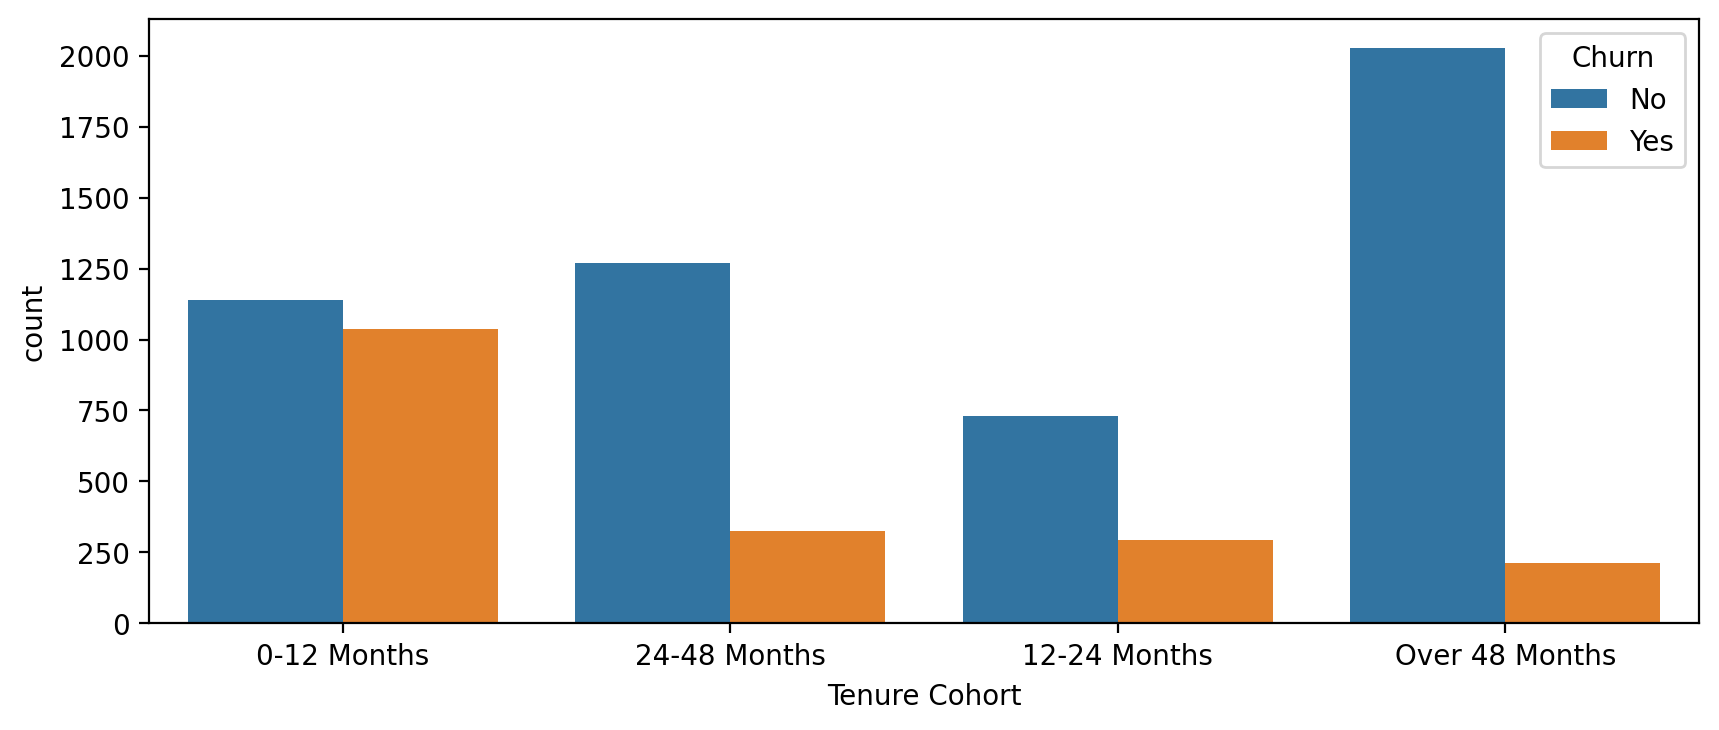

In [92]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(data = df, x = 'Tenure Cohort', hue = 'Churn');

**Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 2000x800 with 0 Axes>

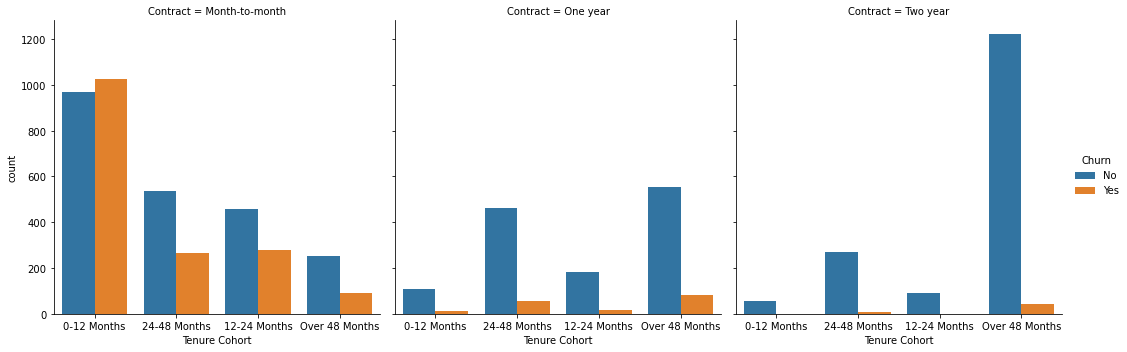

In [93]:
plt.figure(figsize = (10,4), dpi = 200)
sns.catplot(data = df, x = 'Tenure Cohort', hue = 'Churn', col = 'Contract', kind = 'count');

## Predictive Modeling

**Use 4 different tree based methods:**

* Single Decision Tree
* Random Forest
* AdaBoost
* Gradient Boosting


### Data Preprocessing

In [94]:
X = df.drop(['Churn','customerID'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df['Churn']

**Perform a train test split, holding out 10% of the data for testing.**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Single Decision Tree



In [121]:
dt = DecisionTreeClassifier()

In [122]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

In [123]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



/Users/euminzoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


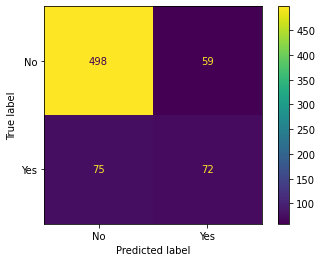

In [124]:
plot_confusion_matrix(dt, X_test, y_test)

**Find feature importance.**

It turned out that *Tenure* is the most important feature.

In [104]:
imp_feats = pd.DataFrame(data = dt2.feature_importances_, index = X.columns, columns = ['Feature Importance']).sort_values("Feature Importance")

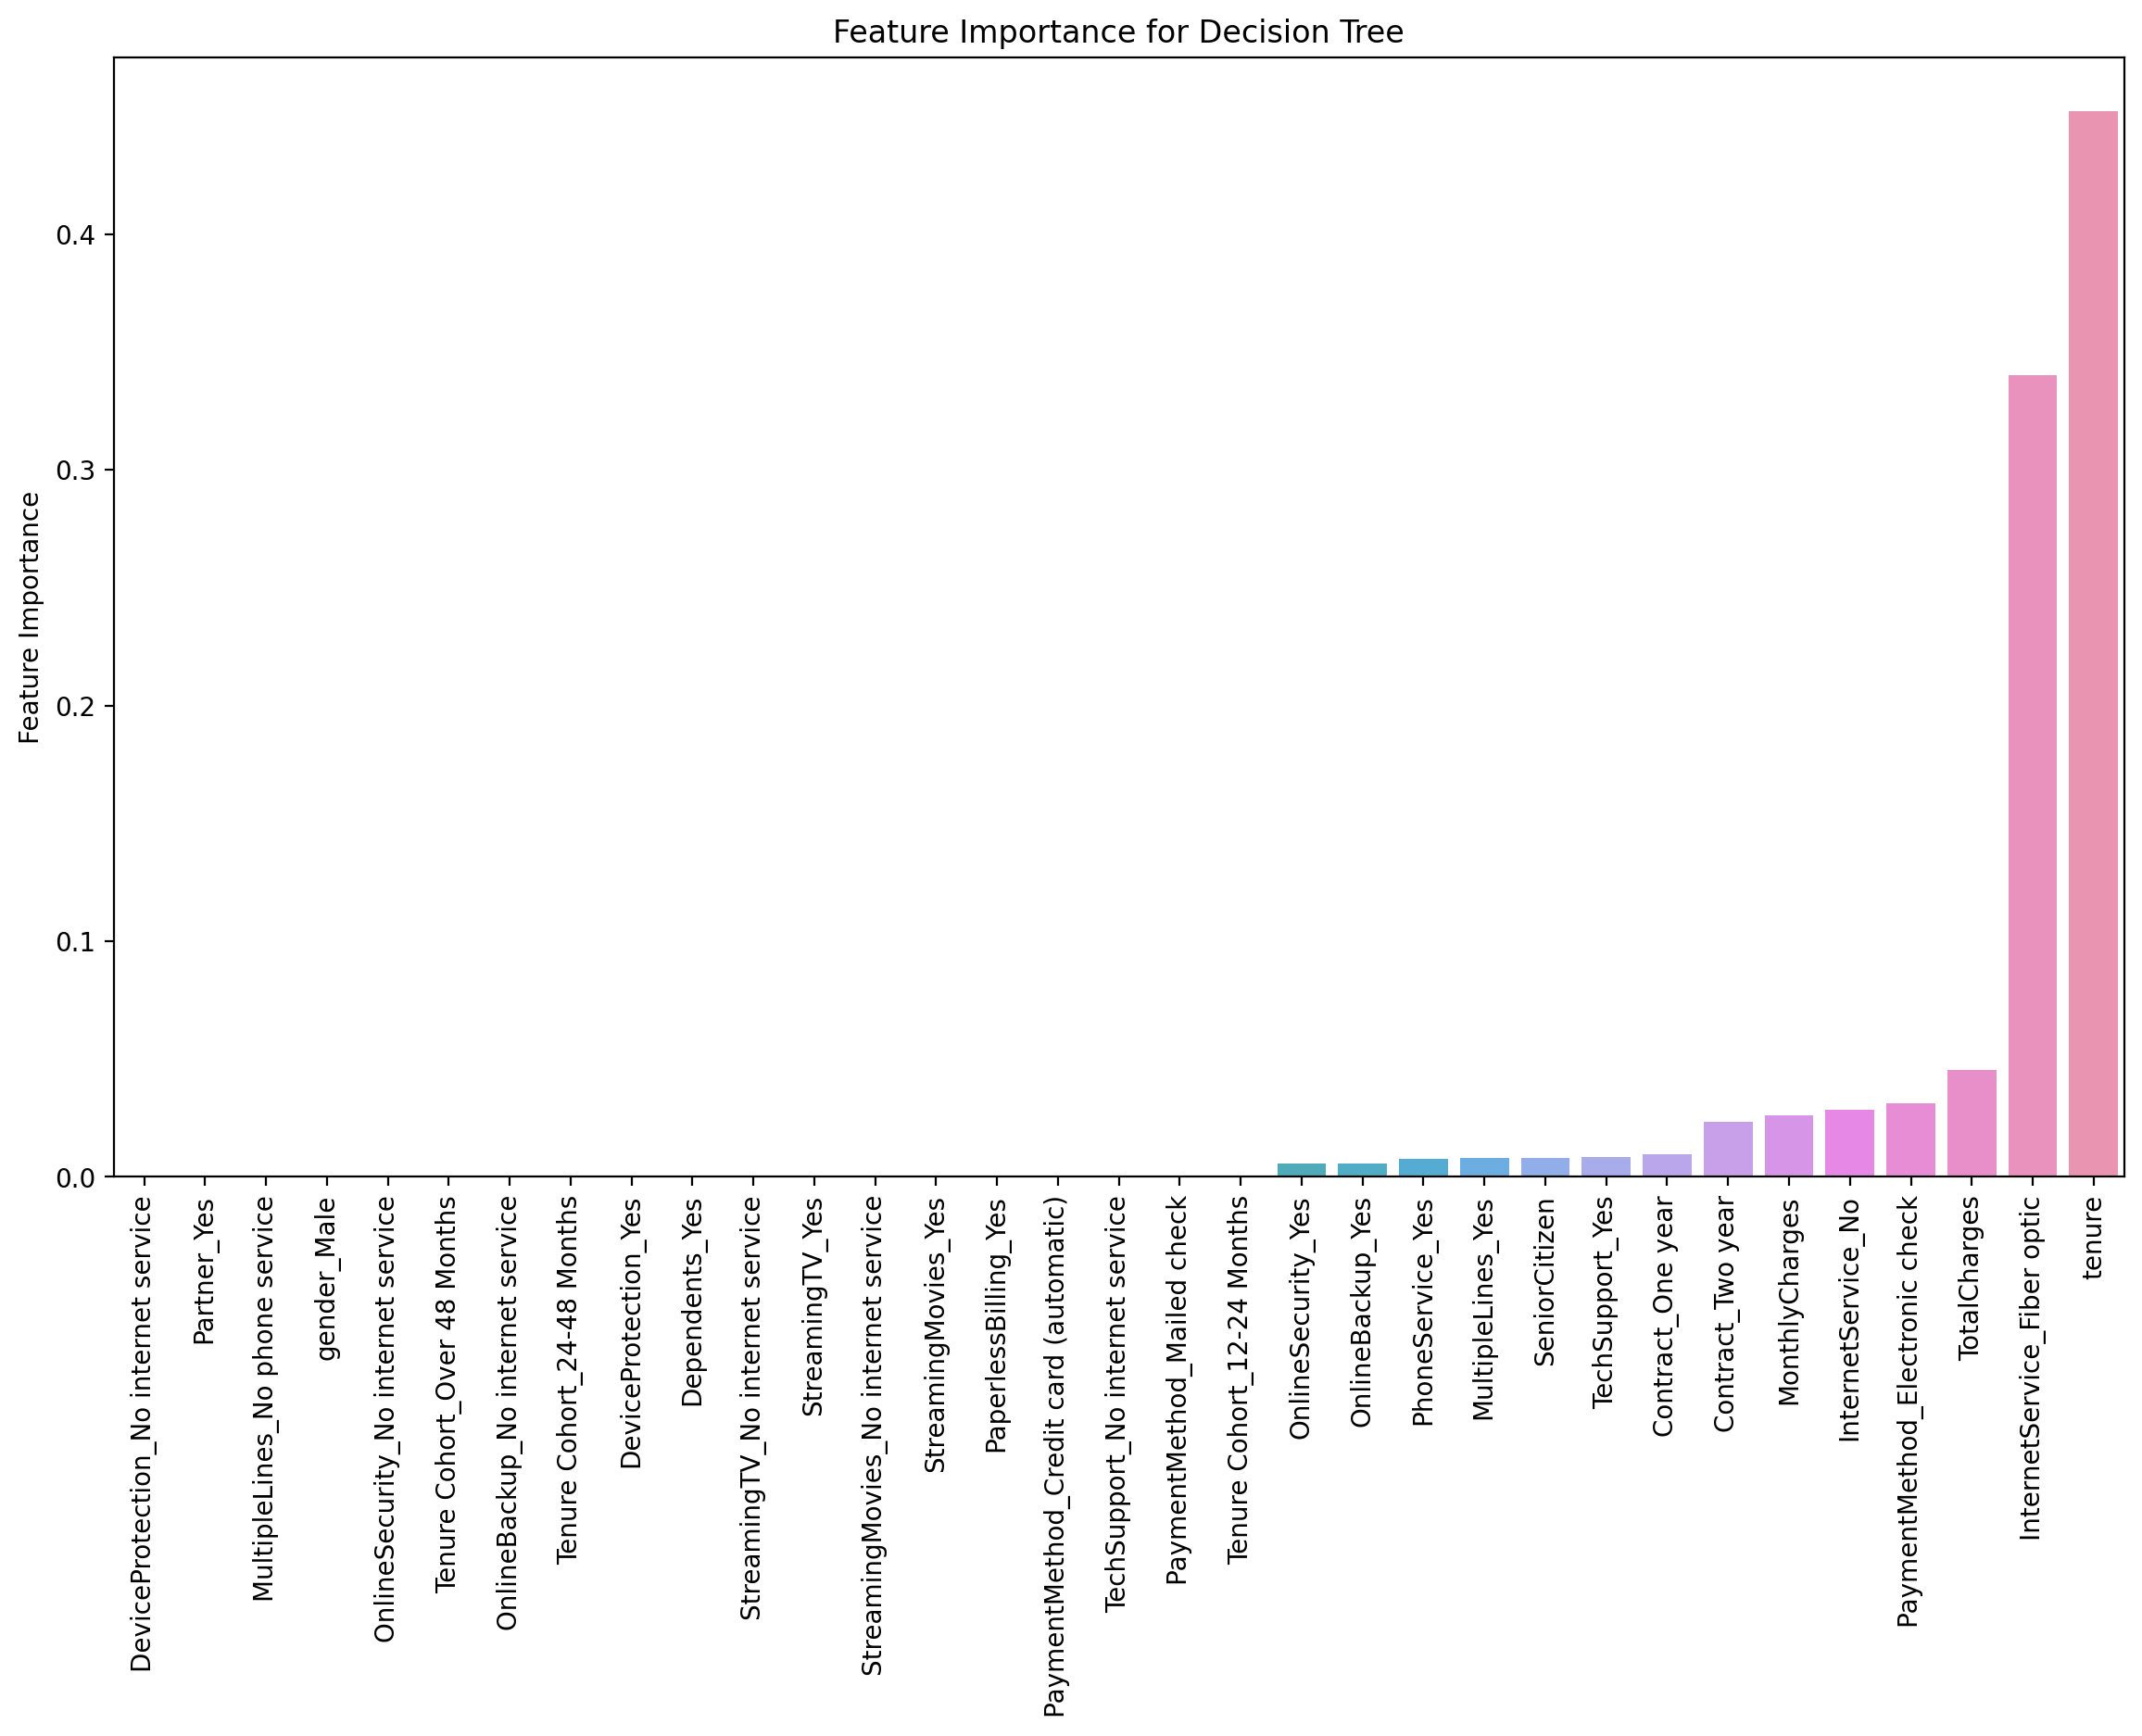

In [107]:
plt.figure(figsize = (14,8), dpi = 200)
sns.barplot(data = imp_feats.sort_values('Feature Importance'), x = imp_feats.sort_values('Feature Importance').index, y = 'Feature Importance')
plt.xticks(rotation = 90)
plt.title("Feature Importance for Decision Tree");

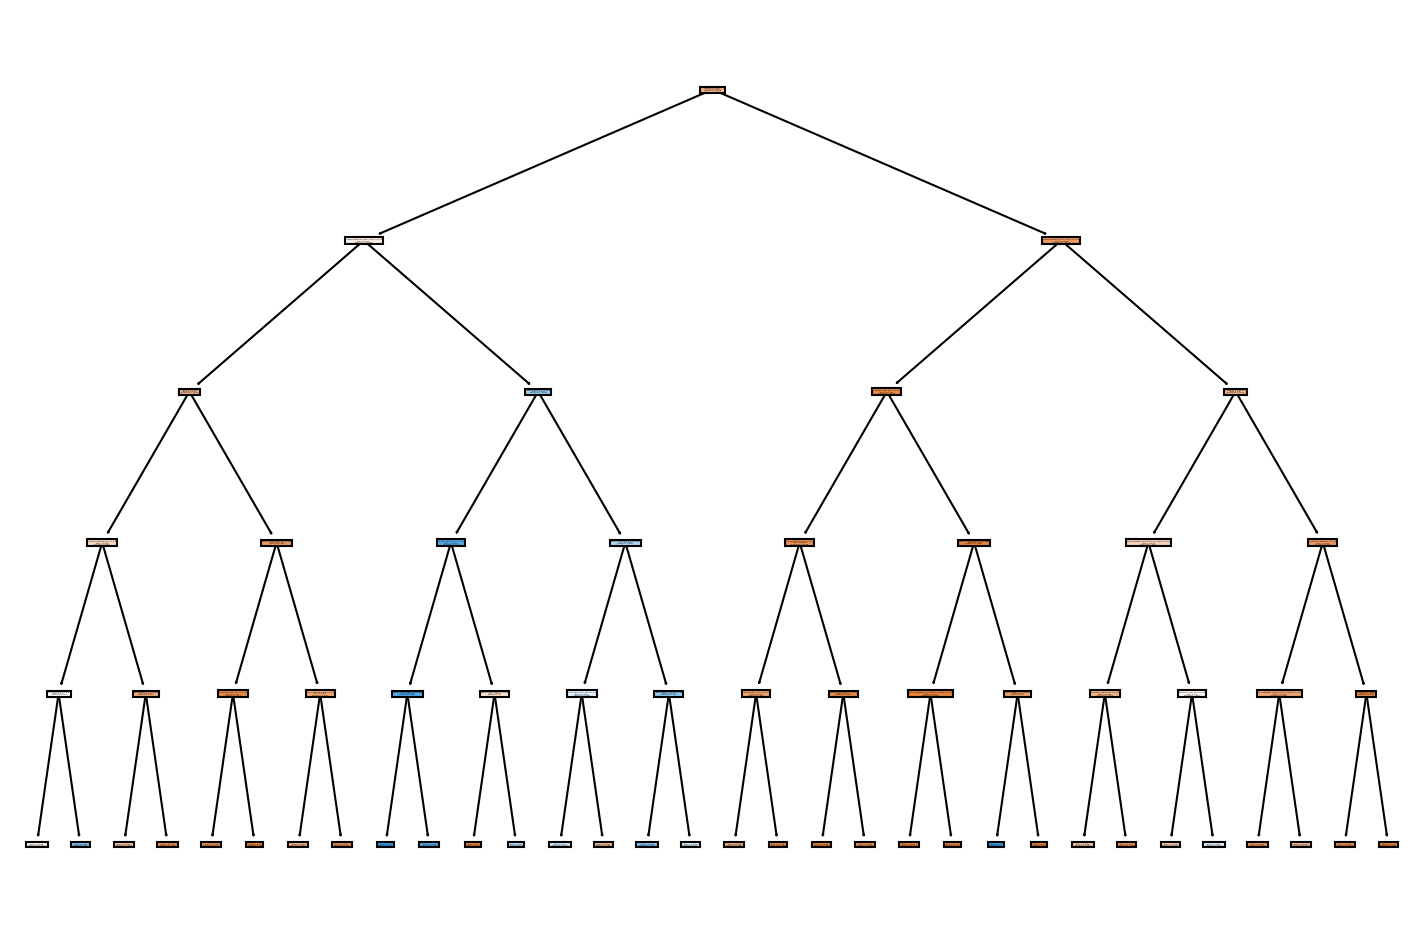

In [106]:
plt.figure(figsize = (12,8), dpi = 150)
plot_tree(dt2, filled = True, feature_names = X.columns);

## Random Forest


In [108]:
rf = RandomForestClassifier(n_estimators=100)

In [109]:
rf.fit(X_train, y_train)
preds2 = rf.predict(X_test)

In [110]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.47      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



/Users/euminzoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


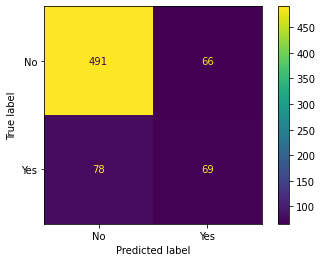

In [111]:
plot_confusion_matrix(rf, X_test, y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [112]:
ada_model = AdaBoostClassifier()

In [113]:
ada_model.fit(X_train, y_train)
preds3 = ada_model.predict(X_test)

In [114]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



/Users/euminzoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


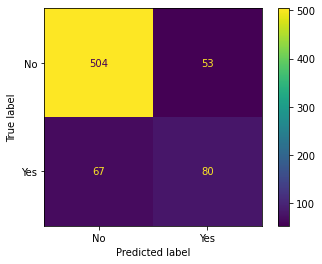

In [115]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [116]:
gb_model = GradientBoostingClassifier()

In [117]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [118]:
preds4 = gb_model.predict(X_test)

In [119]:
print(classification_report(y_test, preds4))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



/Users/euminzoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


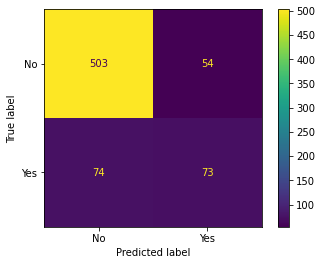

In [120]:
plot_confusion_matrix(gb_model, X_test, y_test)

## Overall Performance

In this project, I found out that *Tenure* is the most important feature that decides whether the customer is going to churn or not. 
Also, with base models, I got best performance from an AdaBoostClassifier with an accuracy of 83%. 